In [93]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#### Prepare the dataset 

In [94]:
#read from the csv file (available at https://datasf.org/opendata/)
sf_crime_input=pd.read_csv('sf_crime.csv')
sf_crime=sf_crime_input[['Analysis Neighborhood','Incident Category']].copy()
#use groupby to add the count column
sf_crime=sf_crime.groupby('Analysis Neighborhood').count()
sf_crime.reset_index(inplace=True)  
sf_crime.rename(columns={'Analysis Neighborhood':'Neighborhood','Incident Category':'Count'}, inplace=True)
sf_crime.reset_index()  
sf_crime.head()

,Neighborhood,Count
0,Bayview Hunters Point,9370
1,Bernal Heights,2783
2,Castro/Upper Market,4683
3,Chinatown,3220
4,Excelsior,2426


#### Let's first examine the crime rate of the neighborhoods

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#sort the above dataframe in descending order
sf_crime.sort_values(['Count'],ascending = False ,axis=0, inplace=True)
sf_crime.head()

,Neighborhood,Count
18,Mission,17573
35,Tenderloin,16517
5,Financial District/South Beach,14773
33,South of Market,13431
0,Bayview Hunters Point,9370


#### Now we are ready to plot a bar chart 

Text(0, 0.5, 'Neighborhood')

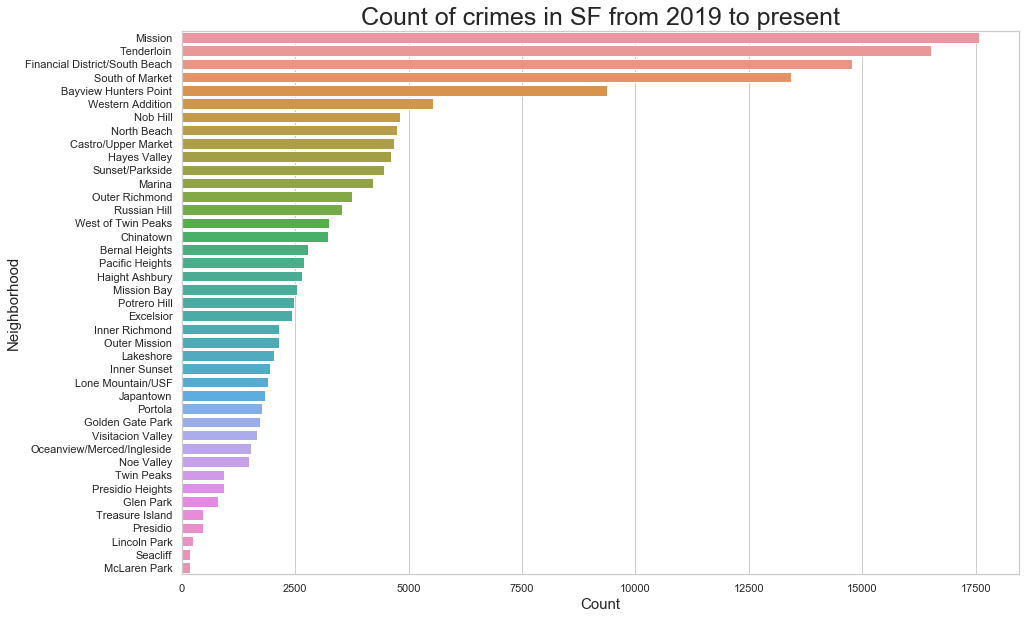

In [97]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
ax=sns.barplot(x='Count',y='Neighborhood',data=sf_crime)
ax.axes.set_title("Count of crimes in SF from 2019 to present",fontsize=25)
ax.set_xlabel('Count',fontsize=15)
# Add a legend and informative axis label
ax.set_ylabel('Neighborhood',fontsize=15)

In [98]:
#get geojson file
sf_geo = r'sf_neighborhood.json'

# create a plain San Francisco map
Latitude = 37.7749
Longtitude = -122.4194
sf_map=folium.Map(location=[Latitude , Longtitude],zoom_start=12)  

# generate choropleth map using the total crime rate by SF Neighborhood
folium.Choropleth(
    geo_data= sf_geo,                  
    data=sf_crime,              # data is the dataframe from above
    columns=['Neighborhood', 'Count'],   
    key_on='feature.properties.nhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco' 
).add_to(sf_map)
sf_map                                   # display San Francisco crime map by neighborhood

In [99]:
#check the filtered dataframe
sf_data= sf_crime[len(sf_crime)//4:]
sf_data 
# Z0LcW

,Neighborhood,Count
34,Sunset/Parkside,4446
16,Marina,4219
25,Outer Richmond,3747
31,Russian Hill,3529
39,West of Twin Peaks,3249
3,Chinatown,3220
1,Bernal Heights,2783
26,Pacific Heights,2700
8,Haight Ashbury,2639
19,Mission Bay,2532


#### We still need to find the coordinates of the above neighborhoods, but there seems no available data about it, so I wrote a webscraping function to help get the coordinates

In [100]:
#get neighborhoods' names. First get array then convert to list
neighborhoods=sf_data.Neighborhood.values
neighborhoods=neighborhoods.tolist()
neighborhoods

['Sunset/Parkside',
 'Marina',
 'Outer Richmond',
 'Russian Hill',
 'West of Twin Peaks',
 'Chinatown',
 'Bernal Heights',
 'Pacific Heights',
 'Haight Ashbury',
 'Mission Bay',
 'Potrero Hill',
 'Excelsior',
 'Inner Richmond',
 'Outer Mission',
 'Lakeshore',
 'Inner Sunset',
 'Lone Mountain/USF',
 'Japantown',
 'Portola',
 'Golden Gate Park',
 'Visitacion Valley',
 'Oceanview/Merced/Ingleside',
 'Noe Valley',
 'Twin Peaks',
 'Presidio Heights',
 'Glen Park',
 'Treasure Island',
 'Presidio',
 'Lincoln Park',
 'Seacliff',
 'McLaren Park']

In [101]:
from bs4 import BeautifulSoup

In [102]:
def get_coordinates(neighborhoods):
    #input is a list of neighborhoods names
    neighborhood_coordinate={}
    count=1
    for neigh in neighborhoods:
        url="https://www.google.com/search?q=sf {} coordinates".format(neigh)
        r=requests.get(url)
        src=r.content
        soup=soup = BeautifulSoup(src)
        coor=soup.find_all("div", class_="BNeawe iBp4i AP7Wnd")
        try:
            coor=str(coor[0])[71:91]
            coor=coor.replace('° N, ',',-')
            neighborhood_coordinate[neigh]=[coor]
        except IndexError:
            neighborhood_coordinate[neigh]=[coor]
        print(str(count)+'done')
        count+=1
    return neighborhood_coordinate

In [78]:
neighborhood_coordinate = get_coordinates(neighborhoods)

1done
2done
3done
4done
5done
6done
7done
8done
9done
10done
11done
12done
13done
14done
15done
16done
17done
18done
19done
20done
21done
22done
23done
24done
25done
26done
27done
28done
29done
30done
31done


In [79]:
#here is the neighborhood coordinates
neighborhood_coordinate

{'Sunset/Parkside': ['37.7425,-122.4896'],
 'Marina': ['37.8037,-122.4368'],
 'Outer Richmond': ['37.7798,-122.4901'],
 'Russian Hill': ['37.8011,-122.4194'],
 'West of Twin Peaks': ['37.7406,-122.4589'],
 'Chinatown': ['37.7941,-122.4078'],
 'Bernal Heights': ['37.7389,-122.4152'],
 'Pacific Heights': ['37.7925,-122.4382'],
 'Haight Ashbury': ['37.7692,-122.4481'],
 'Mission Bay': ['37.7706,-122.3912'],
 'Potrero Hill': ['37.7605,-122.4009'],
 'Excelsior': ['37.7244,-122.4272'],
 'Inner Richmond': ['37.7810,-122.4654'],
 'Outer Mission': ['37.7157,-122.4458'],
 'Lakeshore': ['37.7233,-122.4887'],
 'Inner Sunset': ['37.7602,-122.4703'],
 'Lone Mountain/USF': ['37.7766,-122.4507'],
 'Japantown': ['37.7854,-122.4294'],
 'Portola': ['37.7302,-122.4091'],
 'Golden Gate Park': ['37.7694,-122.4862'],
 'Visitacion Valley': ['37.7172,-122.4043'],
 'Oceanview/Merced/Ingleside': [[]],
 'Noe Valley': [[]],
 'Twin Peaks': ['37.7542,-122.4471'],
 'Presidio Heights': ['37.7925,-122.4382'],
 'Glen Pa

In [80]:
#fix some missing coordinates
neighborhood_coordinate['Oceanview/Merced/Ingleside']=['37.7198,-122.4538']
neighborhood_coordinate['Noe Valley']=['37.7502,-122.4538']
neighborhood_coordinate


{'Sunset/Parkside': ['37.7425,-122.4896'],
 'Marina': ['37.8037,-122.4368'],
 'Outer Richmond': ['37.7798,-122.4901'],
 'Russian Hill': ['37.8011,-122.4194'],
 'West of Twin Peaks': ['37.7406,-122.4589'],
 'Chinatown': ['37.7941,-122.4078'],
 'Bernal Heights': ['37.7389,-122.4152'],
 'Pacific Heights': ['37.7925,-122.4382'],
 'Haight Ashbury': ['37.7692,-122.4481'],
 'Mission Bay': ['37.7706,-122.3912'],
 'Potrero Hill': ['37.7605,-122.4009'],
 'Excelsior': ['37.7244,-122.4272'],
 'Inner Richmond': ['37.7810,-122.4654'],
 'Outer Mission': ['37.7157,-122.4458'],
 'Lakeshore': ['37.7233,-122.4887'],
 'Inner Sunset': ['37.7602,-122.4703'],
 'Lone Mountain/USF': ['37.7766,-122.4507'],
 'Japantown': ['37.7854,-122.4294'],
 'Portola': ['37.7302,-122.4091'],
 'Golden Gate Park': ['37.7694,-122.4862'],
 'Visitacion Valley': ['37.7172,-122.4043'],
 'Oceanview/Merced/Ingleside': ['37.7198,-122.4538'],
 'Noe Valley': ['37.7502,-122.4538'],
 'Twin Peaks': ['37.7542,-122.4471'],
 'Presidio Heights'

In [82]:
#save the scaped result to a csv and clean the csv using excel
df=pd.DataFrame(neighborhood_coordinate)
df.to_csv('neighborhood_coordinate.csv')

In [7]:
neighborhood_coordinate=pd.read_csv('neighborhood_coordinate.csv')
neighborhood_coordinate.head()

,Neighborhood,lat,long
0,Sunset/Parkside,37.7425,-122.4896
1,Marina,37.8037,-122.4368
2,Outer Richmond,37.7798,-122.4901
3,Russian Hill,37.8011,-122.4194
4,West of Twin Peaks,37.7406,-122.4589


### Using Foursquare API to get restaurants information

In [103]:
#hidden client secret

In [11]:
LIMIT=50
lat=neighborhood_coordinate['lat'][3]
long=neighborhood_coordinate['long'][3]
search_query='bus'
radius=300
# create the API request URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    lat, 
    long, 
    VERSION, 
    search_query, 
    radius, 
    LIMIT)

# make the GET request
results = requests.get(url).json()["response"]
len(results['venues'][0])


6

In [50]:
print(len(results['venues']))
for i in range(len(results['venues'])):
    
    print(results['venues'][i]['name'])
    print(results['venues'][i]['location']['lat'])
    print(results['venues'][i]['location']['lng'])
    print(results['venues'][i]['categories'][0]['name'])

2
K D B Restaurants
37.805707
-122.42052
Food
----------------
New Hai Ky
37.791046856216994
-122.42226831184269
Vietnamese Restaurant
----------------


In [55]:
venues_list=[]
for i in range(len(results['venues'])):
    venues_list.append([(
                    results['venues'][i]['name'],
                    results['venues'][i]['location']['lat'],
                    results['venues'][i]['location']['lng'],
                    results['venues'][i]['categories'][0]['name']
                )])
venues_list

[[('K D B Restaurants', 37.805707, -122.42052, 'Food')],
 [('New Hai Ky',
   37.791046856216994,
   -122.42226831184269,
   'Vietnamese Restaurant')]]

In [28]:
def getNearbyFacilities(names, latitudes, longitudes, search_query,radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT=50
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]
        #return only relevant information for each nearby venue
        for i in range(len(results['venues'])):
            venues_list.append([(
                name,
                lat,
                lng,
                results['venues'][i]['name'],
                results['venues'][i]['location']['lat'],
                results['venues'][i]['location']['lng'],
                results['venues'][i]['categories'][0]['name']
            )])
    nearby_fac = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_fac.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_fac)

In [38]:
sf_restaurants = getNearbyFacilities(names=neighborhood_coordinate['Neighborhood'],
                                   latitudes=neighborhood_coordinate['lat'],
                                   longitudes=neighborhood_coordinate['long'],
                                    search_query='restaurants'
                                  )

Sunset/Parkside
Marina
Outer Richmond
Russian Hill
West of Twin Peaks
Chinatown
Bernal Heights
Pacific Heights
Haight Ashbury
Mission Bay
Potrero Hill
Excelsior
Inner Richmond
Outer Mission
Lakeshore
Inner Sunset
Lone Mountain/USF
Japantown
Portola
Golden Gate Park
Visitacion Valley
Oceanview/Merced/Ingleside
Noe Valley
Twin Peaks
Presidio Heights
Glen Park
Treasure Island
Presidio
Lincoln Park
Seacliff
McLaren Park


In [39]:
sf_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sunset/Parkside,37.7425,-122.4896,The Sunset's Best Seafood Restaurant,37.742147,-122.499176,Seafood Restaurant
1,Outer Richmond,37.7798,-122.4901,El Mansour,37.781572,-122.492796,Moroccan Restaurant
2,Russian Hill,37.8011,-122.4194,K D B Restaurants,37.805707,-122.420520,Food
3,Russian Hill,37.8011,-122.4194,New Hai Ky,37.791047,-122.422268,Vietnamese Restaurant
4,Chinatown,37.7941,-122.4078,Gold Coast Restaurants,37.793352,-122.399106,Food


In [40]:
sf_restaurants=sf_restaurants.groupby('Neighborhood').count()

In [46]:
neigh_with_restaurants=list(sf_restaurants.index)
neigh_with_restaurants

['Chinatown',
 'Golden Gate Park',
 'Inner Richmond',
 'Inner Sunset',
 'Japantown',
 'Outer Richmond',
 'Russian Hill',
 'Seacliff',
 'Sunset/Parkside']

As we can see, only neighborhoods above have at least one restaurant nearby (within 1km)

### Get tranportations nearby

In [71]:
def get_transport(names, latitudes, longitudes, search_query,radius=300):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT=50
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION, 
            search_query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]
        #return only relevant information for each nearby venue
        
        for i in range(len(results['venues'])):
            venues_list.append([(
                name,
                lat,
                lng,
                results['venues'][i]['name']
            )])
    nearby_fac = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_fac.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  ]
    
    return(nearby_fac)

Let's first try search subways nearby

In [76]:
sf_metro = get_transport(names=neigh_with_restaurants,
                                   latitudes=neighborhood_coordinate['lat'],
                                   longitudes=neighborhood_coordinate['long'],
                                    search_query='subway'
                                  )

Chinatown
Golden Gate Park
Inner Richmond
Inner Sunset
Japantown
Outer Richmond
Russian Hill
Seacliff
Sunset/Parkside


In [78]:
sf_metro = sf_metro.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']).count()
sf_metro

,,,Venue
Neighborhood,Neighborhood Latitude,Neighborhood Longitude,
Outer Richmond,37.7941,-122.4078,3


There are very few subways near(within 300m) the neighborhoods that we got previously

In [72]:
sf_buses = get_transport(names=neigh_with_restaurants,
                                   latitudes=neighborhood_coordinate['lat'],
                                   longitudes=neighborhood_coordinate['long'],
                                    search_query='bus'
                                  )

Chinatown
Golden Gate Park
Inner Richmond
Inner Sunset
Japantown
Outer Richmond
Russian Hill
Seacliff
Sunset/Parkside


What about buses

In [73]:
sf_buses = sf_buses.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']).count()
sf_buses

,,,Venue
Neighborhood,Neighborhood Latitude,Neighborhood Longitude,
Chinatown,37.7425,-122.4896,1
Golden Gate Park,37.8037,-122.4368,5
Inner Richmond,37.7798,-122.4901,6
Inner Sunset,37.8011,-122.4194,6
Japantown,37.7406,-122.4589,6
Outer Richmond,37.7941,-122.4078,25
Russian Hill,37.7389,-122.4152,2
Seacliff,37.7925,-122.4382,5
Sunset/Parkside,37.7692,-122.4481,33


In [74]:
sortedsf=sf_buses.sort_values(['Venue'],ascending = False ,axis=0)

In [75]:
sortedsf

,,,Venue
Neighborhood,Neighborhood Latitude,Neighborhood Longitude,
Sunset/Parkside,37.7692,-122.4481,33
Outer Richmond,37.7941,-122.4078,25
Inner Richmond,37.7798,-122.4901,6
Inner Sunset,37.8011,-122.4194,6
Japantown,37.7406,-122.4589,6
Golden Gate Park,37.8037,-122.4368,5
Seacliff,37.7925,-122.4382,5
Russian Hill,37.7389,-122.4152,2
Chinatown,37.7425,-122.4896,1


It is obvious that neighborhoods like Golden Gate Park and Seacliff are not good places to set up an office so we can exclude them. Then there is only one bus stop near Chinatown, so let's exclude it as well.

In [79]:
filtered_sf=['Sunset/Parkside','Outer Richmond','Inner Richmond','Inner Sunset','Japantown','Russian Hill']

Finally, let's look at the home values of the above neighborhoods

#### The Zillow Rent Index (ZRI) is a dollar-valued index intended to capture typical market rent for a given segment 

The file has already been cleaned in excel as shown below

In [87]:
zri=pd.read_csv('Neighborhood_Zri_cleaned.csv')
zri

,RegionName,City,SizeRank,Zri,MoM,QoQ,YoY,ZriRecordCnt
0,Outer Sunset,San Francisco,168,3933,-0.0069,-0.0045,0.0028,12666
1,Outer Richmond,San Francisco,358,3993,-0.0164,-0.0124,0.0067,5345
2,Inner Richmond,San Francisco,425,4135,-0.0077,-0.0134,-0.0184,3382
3,Russian Hill,San Francisco,907,5074,-0.0049,-0.0169,-0.0008,2901
4,Inner Sunset,San Francisco,944,4092,-0.0053,-0.0012,-0.0037,1850


note that the provided dataset does not contain Japantown, so I had to exclude it

In [92]:
sorted_zri=zri.sort_values(['Zri'],ascending = True ,axis=0)
sorted_zri.drop(['City','SizeRank','MoM','QoQ','ZriRecordCnt','YoY'], axis=1, inplace=True)
sorted_zri

,RegionName,Zri
0,Outer Sunset,3933
1,Outer Richmond,3993
4,Inner Sunset,4092
2,Inner Richmond,4135
3,Russian Hill,5074
